# Time-dependent heat equation in 2D

In [1]:
using LinearAlgebra
using MatrixDepot
using Kronecker

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


In [2]:
using Plots

In [3]:
# see comments in the "Poisson 2D notebook"
function laplace_operator2D(n, h)
    A_x = (1.0/h^2)*matrixdepot("tridiag",n)
    I_y = (1.0/h^2)*I(n)
    diag = I(n)
    off_diags = matrixdepot("tridiag",ones(n-1),zeros(n),ones(n-1))
    A = diag ⊗ (A_x + 2*I_y) + off_diags ⊗ -I_y # gives us the NEGATIVE laplacian operator (see CS6220 Handout 3)
    return -A # HACK
end

laplace_operator2D (generic function with 1 method)

In [4]:
function unroll_RHS(rhs_matrix)
    unrolled = zeros(size(rhs_matrix,1)*size(rhs_matrix,2))
    count = 1
    # NOTE loop order!!!
    # necessary due to our "column major" assumption
    for j in 1:N
        for i in 1:N
            c = i
            r = (N+1) - j # index that assumes the "bottom" is 1
            unrolled[count] = rhs_matrix[r,c]
            count = count + 1
        end
    end
    return unrolled
end

unroll_RHS (generic function with 1 method)

In [5]:
function reroll(unrolled_rhs,N)
    rerolled = zeros(N,N)
    count = 0
    for j in 1:N
        r = (N+1) - j # index that assumes the "bottom" is 1
        starting_idx = count*N+1
        rerolled[r,:] = unrolled_rhs[starting_idx:(starting_idx + N - 1)]
        count = count + 1
    end
    return rerolled
end

reroll (generic function with 1 method)

## Initial distribution

In [6]:
N = 40

40

In [7]:
h = 1/(N+1) # we assume that side length is 1. Recall that N+1 is the number of intervals

0.024390243902439025

In [8]:
function gen_2D_positions_x(N, h)
    B = zeros(N,N); # intialize to zero
    
    for i in 1:N
        for j in 1:N
            c = i
            r = (N+1) - j # index that assumes the "bottom" is 1
            B[r,c] = i*h
        end
    end
    
    return B
end

gen_2D_positions_x (generic function with 1 method)

In [9]:
function gen_2D_positions_y(N, h)
    B = zeros(N,N); # intialize to zero
    
    for i in 1:N
        for j in 1:N
            c = i
            r = (N+1) - j # index that assumes the "bottom" is 1
            B[r,c] = j*h
        end
    end
    
    return B
end

gen_2D_positions_y (generic function with 1 method)

In [10]:
function exponential_2D(m)
    R = zeros(m,m)
        center = [(m+1)/2; (m+1)/2]
        for i=1:m
            for j=1:m
                position = [i; j] - center
                normalized_position = position/(m-1)
                R[i,j] = norm(normalized_position)
            end
        end

    #return R
    f_0 = λ -> exp(-(λ).^2 / 0.1^2)
    return f_0.(R)
end 

exponential_2D (generic function with 1 method)

In [11]:
init_distribution = exponential_2D(N)

40×40 Array{Float64,2}:
 1.92875e-22  2.34584e-21  2.50158e-20  …  2.34584e-21  1.92875e-22
 2.34584e-21  2.85312e-20  3.04254e-19     2.85312e-20  2.34584e-21
 2.50158e-20  3.04254e-19  3.24454e-18     3.04254e-19  2.50158e-20
 2.33896e-19  2.84476e-18  3.03363e-17     2.84476e-18  2.33896e-19
 1.91746e-18  2.33211e-17  2.48694e-16     2.33211e-17  1.91746e-18
 1.37824e-17  1.67628e-16  1.78756e-15  …  1.67628e-16  1.37824e-17
 8.68587e-17  1.05642e-15  1.12655e-14     1.05642e-15  8.68587e-17
 4.79951e-16  5.8374e-15   6.22495e-14     5.8374e-15   4.79951e-16
 2.32528e-15  2.82811e-14  3.01587e-13     2.82811e-14  2.32528e-15
 9.87746e-15  1.20135e-13  1.2811e-12      1.20135e-13  9.87746e-15
 3.67883e-14  4.47437e-13  4.77143e-12  …  4.47437e-13  3.67883e-14
 1.20135e-13  1.46113e-12  1.55814e-11     1.46113e-12  1.20135e-13
 3.43969e-13  4.18352e-12  4.46126e-11     4.18352e-12  3.43969e-13
 ⋮                                      ⋱               
 1.20135e-13  1.46113e-12  1.55814e

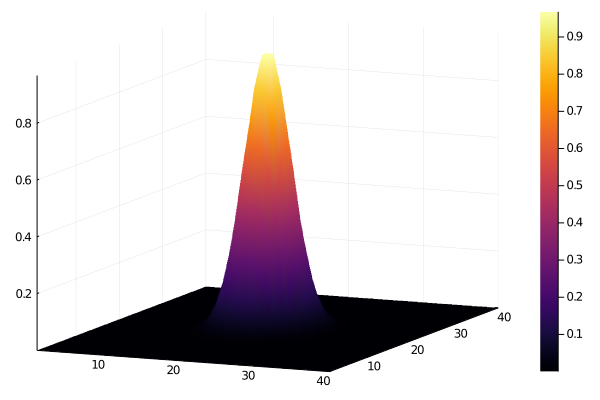

In [12]:
surface(init_distribution)

In [13]:
initial_unrolled = unroll_RHS(init_distribution)

1600-element Array{Float64,1}:
 1.9287498479639178e-22
 2.3458394151192828e-21
 2.5015789430083706e-20
 2.3389649041791597e-19
 1.9174619620972774e-18
 1.3782352984436142e-17
 8.685874280406793e-17
 4.799514066274915e-16
 2.3252762607750957e-15
 9.877462875961206e-15
 3.678830797786322e-14
 1.2013450972020886e-13
 3.4396900199710766e-13
 ⋮
 1.2013450972020886e-13
 3.678830797786322e-14
 9.877462875961206e-15
 2.3252762607750957e-15
 4.799514066274915e-16
 8.685874280406793e-17
 1.3782352984436142e-17
 1.9174619620972774e-18
 2.3389649041791597e-19
 2.5015789430083706e-20
 2.3458394151192828e-21
 1.9287498479639178e-22

In [14]:
α = 0.01
A = laplace_operator2D(N,h); 
A = α*A; # mind the minus sign!

In [15]:
A

1600×1600 Array{Float64,2}:
 -67.24   16.81   -0.0    -0.0    -0.0   …   -0.0    -0.0    -0.0    -0.0
  16.81  -67.24   16.81   -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    16.81  -67.24   16.81   -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    16.81  -67.24   16.81      -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    16.81  -67.24      -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    16.81  …   -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0   …   -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
  -0.0    -0.0    -0.0    -0.0    -0.0       -0.0    -0.0    -0.0    -0.0
   ⋮      

## Plugging into ODE solver

In [16]:
using DifferentialEquations

In [17]:
t_0 = 0.0 
t_final = 1.0
tspan = (t_0, t_final)
f(du,u,p,t) = mul!(du,A,u) # "in-place" solve
ode_prob = ODEProblem(f,initial_unrolled,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [1.9287498479639178e-22, 2.3458394151192828e-21, 2.5015789430083706e-20, 2.3389649041791597e-19, 1.9174619620972774e-18, 1.3782352984436142e-17, 8.685874280406793e-17, 4.799514066274915e-16, 2.3252762607750957e-15, 9.877462875961206e-15  …  9.877462875961206e-15, 2.3252762607750957e-15, 4.799514066274915e-16, 8.685874280406793e-17, 1.3782352984436142e-17, 1.9174619620972774e-18, 2.3389649041791597e-19, 2.5015789430083706e-20, 2.3458394151192828e-21, 1.9287498479639178e-22]

In [18]:
ode_sln = solve(ode_prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 23-element Array{Float64,1}:
 0.0
 0.0431488781529113
 0.07969628544101592
 0.13508890557323563
 0.19535999685525426
 0.272732707391143
 0.3625798941466867
 0.39286049461099304
 0.4185527913536566
 0.4425158442382539
 0.4664213611081434
 0.4910775946384178
 0.516647560690118
 0.5428781094697885
 0.5693619210719426
 0.595776756855002
 0.6481970104489048
 0.7027650336088777
 0.7652064247308417
 0.8306017633054407
 0.900217115608074
 0.9740341127044744
 1.0
u: 23-element Array{Array{Float64,1},1}:
 [1.9287498479639178e-22, 2.3458394151192828e-21, 2.5015789430083706e-20, 2.3389649041791597e-19, 1.9174619620972774e-18, 1.3782352984436142e-17, 8.685874280406793e-17, 4.799514066274915e-16, 2.3252762607750957e-15, 9.877462875961206e-15  …  9.877462875961206e-15, 2.3252762607750957e-15, 4.799514066274915e-16, 8.685874280406793e-17, 1.3782352984436142e-17, 1.9174619620972774e-18, 2.3389649041791597e-19, 2.5015789430083706

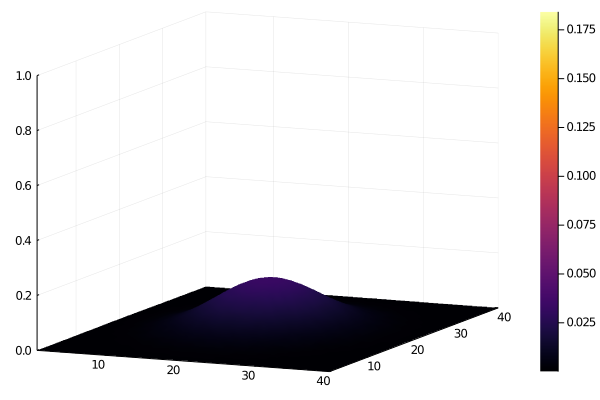

In [19]:
surface(reroll(ode_sln[end],N), zlims=(0.0,1))

┌ Info: Saved animation to 
│   fn = /home/nathan/Code/heat-transport-experiments/interactive_notebooks/tmp.gif
└ @ Plots /home/nathan/.julia/packages/Plots/sbXPh/src/animation.jl:104


Plots.AnimatedGif("/home/nathan/Code/heat-transport-experiments/interactive_notebooks/tmp.gif")
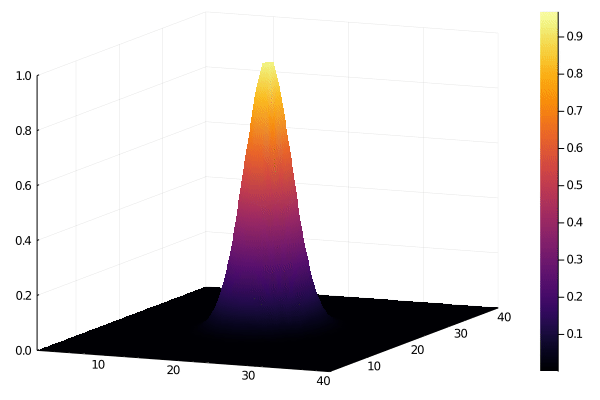

In [20]:
@gif for i=1:size(ode_sln,2)
    surface(reroll(ode_sln[i],N), zlims=(0.0,1))
end

## "Rolling my own" forward Euler solver

In [23]:
Δt_max = h^2/4
safety_tol = 0.01*Δt_max
Δt = Δt_max + safety_tol

0.00015020820939916718

In [25]:
function solve_fwd_euler(α, A, u_initial, Δt, t_0, t_final)
    du_dt = zeros(size(u_initial)) # preallocate space to hold derivative
    u = copy(u_initial)
    t = t_0
    while t < t_final
        mul!(du_dt,A,u) # update du_dt in place
        u .= u .+ du_dt.*Δt # in-place forward Euler update of u
        t += Δt
    end
    return u
end

solve_fwd_euler (generic function with 1 method)

In [31]:
euler_sln_unrolled = solve_fwd_euler(α, A, vec(init_distribution), Δt, t_0, t_final);

In [32]:
euler_sln = reshape(euler_sln_unrolled, N, N);

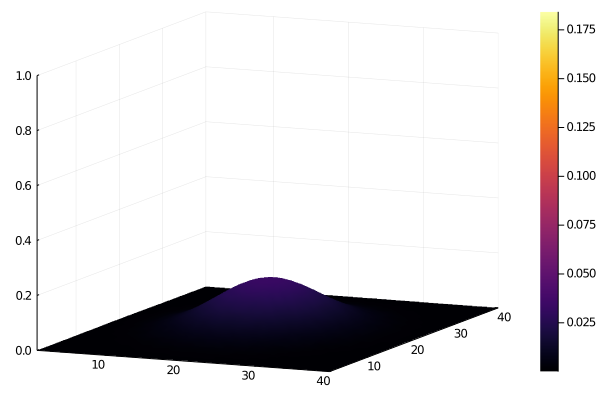

In [33]:
surface(euler_sln, zlims=(0.0,1))

Plot difference between my own solution and the solution from the ODE solver:

In [37]:
sln_diff = euler_sln - reroll(ode_sln[end],N);

In [40]:
maximum(sln_diff)

7.684273072627867e-6

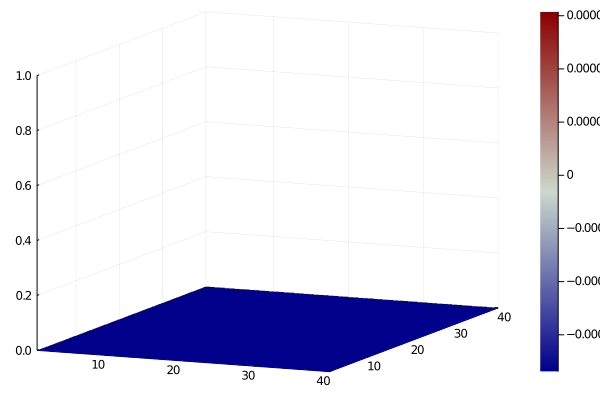

In [60]:
surface(sln_diff, zlims=(0.0,1), color=:bluesreds)

Error plot with autoscaled axes:

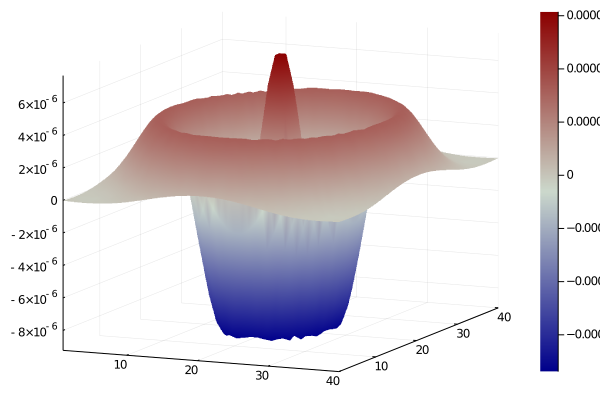

In [58]:
surface(sln_diff, color=:bluesreds)

⬇️ See what my solution at $t=0.5$ looks like:

In [41]:
sln_t0_5 = solve_fwd_euler(α, A, vec(init_distribution), Δt, t_0, 0.5);

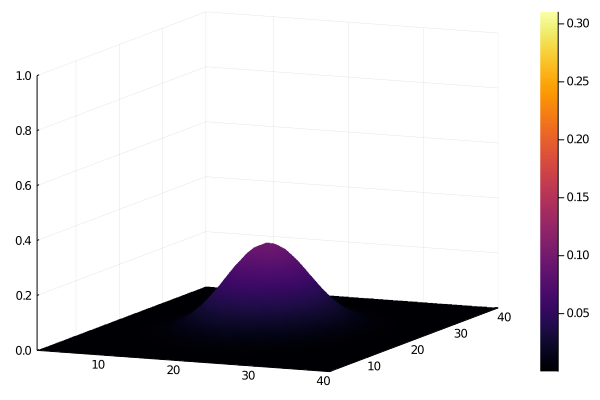

In [43]:
surface(reshape(sln_t0_5,N,N), zlims=(0.0,1))

Compare to solution from Julia's ODE solver, below: 

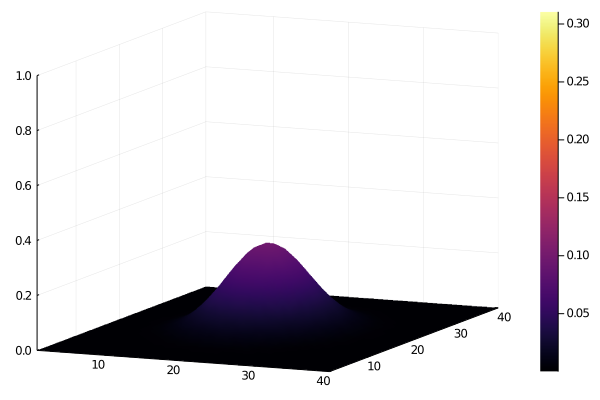

In [46]:
surface(reshape(ode_sln(0.5), N, N), zlims=(0.0,1))

Plot the difference between the two:

In [48]:
diff_t0_5 = sln_t0_5 - ode_sln(0.5);

In [49]:
maximum(diff_t0_5)

3.9926456769173724e-5

In [61]:
surface(reshape(diff_t0_5, N, N), zlims=(0.0,1), color=:bluesreds)

Error plot with autoscaled axes:

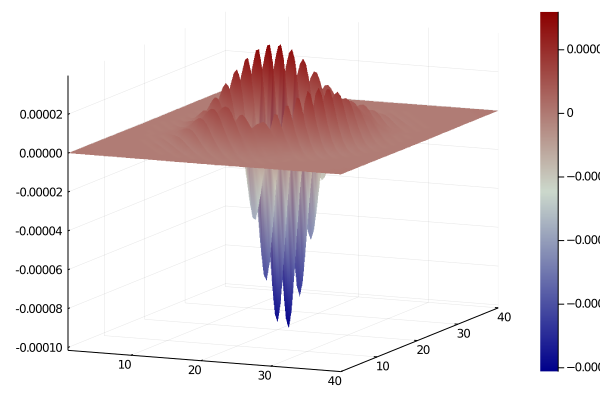

In [62]:
surface(reshape(diff_t0_5, N, N), color=:bluesreds)